# Restricted Botlzman Machines (RBM)

In [45]:
import os
from typing import List, Dict, Tuple, Literal, Optional, Union

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from numba import jit

In [2]:
DATA_FOLDER = "../data/"
ALPHA_DIGIT_PATH = os.path.join(DATA_FOLDER, "binaryalphadigs.mat")

if not os.path.exists(ALPHA_DIGIT_PATH):
    raise FileNotFoundError(f"The file {ALPHA_DIGIT_PATH} does not exist.")

### 3.1 Construction d’un RBM et test sur Binary AlphaDigits

On complètera au fur et à mesure un script `principal_RBM_alpha` permettant d’apprendre les caractères de la base Binary AlphaDigits de votre choix via un RBM et de générer des caractères similaires à ceux appris.

La construction de ce programme nécessite les fonctions suivantes:

- [ ] Écrire une fonction `lire_alpha_digit` permettant de récupérer les données sous forme matricielle (en ligne les données, en colonne les pixels) et qui prend en argument les caractères (ou leur indice 0, · · · , 35) que l’on souhaite "apprendre".

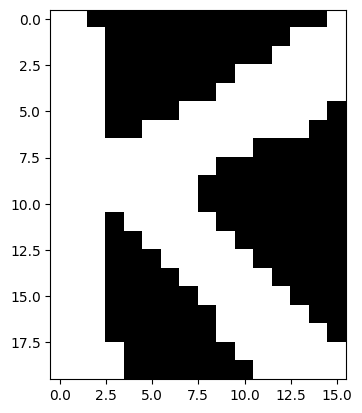

In [3]:
def _load_data(file_path: str) -> Dict[str, np.ndarray]:
    """
    Load Binary AlphaDigits data from a .mat file.

    Parameters:
    - file_path (str): Path to the .mat file containing the data.

    Returns:
    - data (dict): Loaded data dictionary.
    """
    if file_path is None:
        raise ValueError("File path must be provided.")
    return scipy.io.loadmat(file_path)

def _map_character_to_index(character: Union[str, int]) -> int:
    """
    Map alphanumeric character to its corresponding index.

    Parameters:
    - character (str or int): Alphanumeric character or its index.

    Returns:
    - char_index (int): Corresponding index for the character.
    """
    if isinstance(character, int) and 0 <= character <= 35:
        return character
    elif (isinstance(character, str) and character.isdigit() 
          and 0 <= int(character) <= 9):
        return int(character)
    elif (isinstance(character, str) and character.isalpha() 
          and 'A' <= character.upper() <= 'Z'):
        return ord(character.upper()) - ord('A') + 10
    else:
        raise ValueError(
            "Invalid character input. It should be an alphanumeric" 
            "character '[0-9|A-Z]' or its index representing '[0-35]'."
        )

def lire_alpha_digit(character: Optional[Union[str, int]] = None,
                     file_path: Optional[str] = ALPHA_DIGIT_PATH,
                     data: Optional[Dict[str, np.ndarray]] = None,
                     use_data: bool = False,
                     ) -> np.ndarray:
    """
    Read Binary AlphaDigits data from a .mat file or use already loaded data,
    get the index associated with the alphanumeric character, and flatten the
    images.

    Parameters:
    - file_path (str, optional): Path to the .mat file containing the data. 
        Default is None.
    - data (dict, optional): Already loaded data dictionary. 
        Default is None.
    - use_data (bool): Flag to indicate whether to use already loaded data.
        Default is False.
    - character (str or int, optional): Alphanumeric character or its index 
        whose data needs to be extracted. Default is None.

    Returns:
    - flattened_images (numpy.ndarray): Flattened images for the specified character.
    """
    if not use_data:
        data = _load_data(file_path)

    char_index = _map_character_to_index(character)

    # Select the row corresponding to the character index
    char_data: np.ndarray = data['dat'][char_index]
    
    # Flatten each image into a one-dimensional vector
    flattened_images = np.array([image.flatten() for image in char_data])

    return flattened_images

char = 20
data = lire_alpha_digit(char, ALPHA_DIGIT_PATH)
plt.imshow(data[0].reshape(20, 16), cmap="gray")
plt.show()


In [4]:
# # GENERALIZATION
# def _map_character_to_index(character: Union[str, int, List[Union[str, int]]]) -> List[int]:
#     """
#     Map alphanumeric character to its corresponding index.

#     Parameters:
#     - character (str, int, list of str or int): Alphanumeric character or its index.

#     Returns:
#     - char_index (int): Corresponding index for the character.
#     """
#     if isinstance(character, list):
#         return [_map_character_to_index(char) for char in character]
#     elif isinstance(character, int) and 0 <= character <= 35:
#         return [character]
#     elif (isinstance(character, str) and character.isdigit()
#           and 0 <= int(character) <= 9):
#         return [int(character)]
#     elif (isinstance(character, str) and character.isalpha()
#           and 'A' <= character.upper() <= 'Z'):
#         return [ord(character.upper()) - ord('A') + 10]
#     else:
#         raise ValueError(
#             "Invalid character input. It should be an alphanumeric" 
#             "character '[0-9|A-Z]' or its index representing '[0-35]'."
#         )

# def lire_alpha_digit(characters: Optional[Union[str, int, List[Union[str, int]]]] = None,
#                      file_path: Optional[str] = ALPHA_DIGIT_PATH,
#                      data_mat: Optional[Dict[str, np.ndarray]] = None,
#                      use_data: bool = False,
#                      ) -> np.ndarray:
#     """
#     Read Binary AlphaDigits data from a .mat file or use already loaded data,
#     get the index associated with the alphanumeric character, and flatten the
#     images.

#     Parameters:
#     - file_path (str, optional): Path to the .mat file containing the data. 
#         Default is None.
#     - data_mat (dict, optional): Already loaded data dictionary. 
#         Default is None.
#     - use_data (bool): Flag to indicate whether to use already loaded data.
#         Default is False.
#     - characters (str, int, list of str or int, optional): Alphanumeric characters 
#         or their indices whose data needs to be extracted. Default is None.

#     Returns:
#     - flattened_images (numpy.ndarray): Flattened images for the specified character.
#     """
#     if not use_data:
#         data_mat = _load_data(file_path)
    
#     if isinstance(characters, list):
#         char_indices = _map_character_to_index(characters)
    

#     flattened_images_list = []
#     for char_index in char_indices:
#         # Select the row corresponding to the character index
#         char_data: np.ndarray = data_mat['dat'][char_index]

#         # Flatten each image into a one-dimensional vector
#         flattened_images_list.append(np.array([image.flatten() for image in char_data]))

#     return np.concatenate(flattened_images_list, axis=0)


# chars = ["A", "B"]
# data_2 = lire_alpha_digit(chars, ALPHA_DIGIT_PATH)
# print(data_2.shape)


In [5]:
print("data shape:", data.shape)

data shape: (39, 320)


In [48]:
class RBM:
    def __init__(self, n_visible: int, n_hidden: int, random_state=None) -> None:
        """
        Initialize the Restricted Boltzmann Machine.

        Parameters:
        - n_visible (int): Number of visible units.
        - n_hidden (int): Number of hidden units.
        - random_state: Random seed for reproducibility.
        """
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        
        self.a = np.zeros((1, n_visible))
        self.b = np.zeros((1, n_hidden))
        self.rng = np.random.default_rng(random_state)
        self.W = 1e-4 * self.rng.standard_normal(size=(n_visible, n_hidden))

    def _sigmoid(self, x: np.ndarray) -> np.ndarray:
        """
        Sigmoid activation function.

        Parameters:
        - x (numpy.ndarray): Input array.

        Returns:
        - numpy.ndarray: Result of applying the sigmoid function to the input.
        """
        return 1 / (1 + np.exp(-x))
    
    def _reconstruction_error(self, input: np.ndarray, image: np.ndarray) -> float:
        """
        Compute reconstruction error.

        Parameters:
        - input (numpy.ndarray): Original input data.
        - image (numpy.ndarray): Reconstructed image.

        Returns:
        - float: Reconstruction error.
        """
        return np.round(np.power(image - input, 2).mean(), 3)

    def entree_sortie(self, data: np.ndarray) -> np.ndarray:
        """
        Compute hidden units given visible units.

        Parameters:
        - data (numpy.ndarray): Input data, shape (n_samples, n_visible).

        Returns:
        - numpy.ndarray: Hidden unit activations, shape (n_samples, n_hidden).
        """
        return self._sigmoid(data @ self.W + self.b)

    def sortie_entree(self, data_h: np.ndarray) -> np.ndarray:
        """
        Compute visible units given hidden units.

        Parameters:
        - data_h (numpy.ndarray): Hidden unit activations, shape (n_samples, n_hidden).

        Returns:
        - numpy.ndarray: Reconstructed visible units, shape (n_samples, n_visible).
        """
        return self._sigmoid(data_h @ self.W.T + self.a)

    def train(self, data: np.ndarray, learning_rate: float = 0.1, n_epochs: int = 10, batch_size: int = 10) -> 'RBM':
        """
        Train the RBM using Contrastive Divergence.

        Parameters:
        - data (numpy.ndarray): Input data, shape (n_samples, n_visible).
        - learning_rate (float): Learning rate for gradient descent. Default is 0.1.
        - n_epochs (int): Number of training epochs. Default is 10.
        - batch_size (int): Size of mini-batches. Default is 10.

        Returns:
        - RBM: Trained RBM instance.
        """
        n_samples = data.shape[0]
        for epoch in range(n_epochs):
            self.rng.shuffle(data)
            for i in range(0, n_samples, batch_size):
                batch = data[i:i+batch_size]
                pos_h_probs = self.entree_sortie(batch)
                pos_v_probs = self.sortie_entree(pos_h_probs)
                neg_h_probs = self.entree_sortie(pos_v_probs)
                
                # Update weights and biases
                self.W += learning_rate * (batch.T @ pos_h_probs - pos_v_probs.T @ neg_h_probs) / batch_size
                self.b += learning_rate * (pos_h_probs.mean(axis=0) - neg_h_probs.mean(axis=0))
                self.a += learning_rate * (batch.mean(axis=0) - pos_v_probs.mean(axis=0))
                
            if epoch % 10 == 0:  # Print every 10 epochs
                print(f"Epochs: {epoch}. Reconstruction error: {self._reconstruction_error(batch, pos_v_probs)}.")

        return self

    def generer_image(self, n_samples: int=1, n_gibbs_steps: int=1000) -> np.ndarray:
        """
        Generate samples from the RBM using Gibbs sampling.

        Parameters:
        - n_samples (int): Number of samples to generate. Default is 1.
        - n_gibbs_steps (int): Number of Gibbs sampling steps. Default is 100.

        Returns:
        - numpy.ndarray: Generated samples, shape (n_samples, n_visible).
        """
        samples = np.zeros((n_samples, self.n_visible))
        
        # Matrix of initlization value of Gibbs samples for each sample. 
        V = self.rng.binomial(1, self.rng.random(), size=n_samples * self.n_visible).reshape((n_samples, self.n_visible))
        for i in range(n_samples):
            for _ in range(n_gibbs_steps):
                h_probs = self._sigmoid(V[i] @ self.W + self.b)
                h = self.rng.binomial(1, h_probs)
                v_probs = self._sigmoid(h @ self.W.T + self.a)
                v = self.rng.binomial(1, v_probs)
            samples[i] = v
        return samples


Epochs: 0. Reconstruction error: 0.21.
Epochs: 10. Reconstruction error: 0.174.
Epochs: 20. Reconstruction error: 0.143.
Epochs: 30. Reconstruction error: 0.104.
Epochs: 40. Reconstruction error: 0.09.


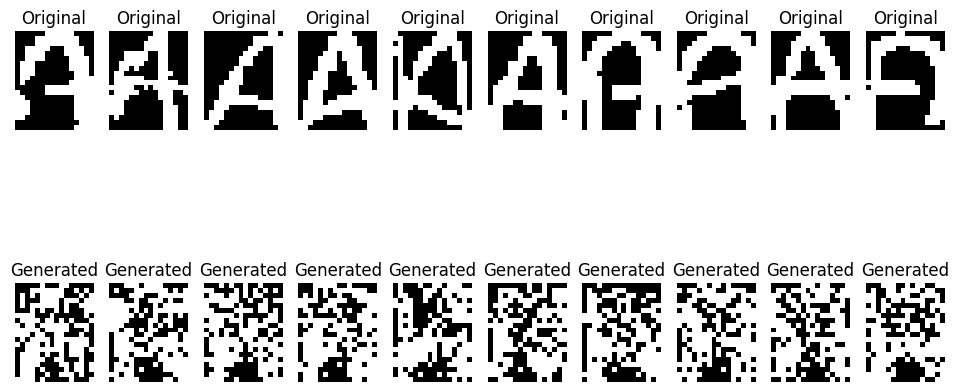

In [49]:
# Load the alpha_digit data
data = lire_alpha_digit(file_path=ALPHA_DIGIT_PATH, character='A')

# Initialize RBM
n_visible = data.shape[1]  # Number of visible units (size of each image)
n_hidden = 100  # Number of hidden units (hyperparameter)
rbm = RBM(n_visible=n_visible, n_hidden=n_hidden, random_state=42)

# Train RBM
rbm.train(data, learning_rate=0.1, n_epochs=50, batch_size=10)

# Generate samples
generated_samples = rbm.generer_image(n_samples=10, n_gibbs_steps=100)

# Plot original and generated samples
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(data[i].reshape(20, 16), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(2, 10, i + 11)
    plt.imshow(generated_samples[i].reshape(20, 16), cmap='gray')
    plt.title('Generated')
    plt.axis('off')

plt.show()